<a href="https://colab.research.google.com/github/Mahnazshamissa/Python/blob/main/asigmo_dl_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup notebook environment

Make sure the Colab environment has a GPU enabled 
*Edit->Notebook settings->Hardware accelerator->Choose GPU*

In [ ]:
! nvidia-smi

Wed Oct 28 08:57:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! wget https://pub.ist.ac.at/~mlechner/datasets/f8d.tar.gz
! tar -xf f8d.tar.gz

--2020-10-28 08:57:17--  https://pub.ist.ac.at/~mlechner/datasets/f8d.tar.gz
Resolving pub.ist.ac.at (pub.ist.ac.at)... 81.223.84.195
Connecting to pub.ist.ac.at (pub.ist.ac.at)|81.223.84.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76149807 (73M) [application/x-gzip]
Saving to: ‘f8d.tar.gz’

f8d.tar.gz          100%[===================>]  72.62M  1.84MB/s    in 20s     

2020-10-28 08:57:38 (3.72 MB/s) - ‘f8d.tar.gz’ saved [76149807/76149807]



In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "f8d/test", shuffle=False, batch_size=128, image_size=(256, 256),
)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "f8d/training",
  shuffle=True,
  batch_size=64,
  image_size=(256, 256),
  validation_split=0.2,
  subset="training",
  seed=1020202,
)
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "f8d/training",
  shuffle=True,
  batch_size=128,
  image_size=(256, 256),
  validation_split=0.2,
  subset="validation",
  seed=1020202,
)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 640 files belonging to 8 classes.
Found 1840 files belonging to 8 classes.
Using 1472 files for training.
Found 1840 files belonging to 8 classes.
Using 368 files for validation.


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(256,256,3)),
  tf.keras.layers.experimental.preprocessing.RandomCrop(224, 224),
  tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),
  tf.keras.layers.Conv2D(64, 7, strides=2, activation="relu", padding="same"),
  tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128,4, activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256,3, activation="relu", padding="same"),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8,activation="softmax"),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_crop (RandomCrop)     (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 64)      9472      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       1

In [ ]:
training_log = model.fit(
  train_dataset, epochs=150, validation_data=valid_dataset
)

Epoch 1/150
23/23 [==============================] - 4s 176ms/step - loss: 1.8836 - sparse_categorical_accuracy: 0.2874 - val_loss: 2.0810 - val_sparse_categorical_accuracy: 0.1168
Epoch 2/150
23/23 [==============================] - 3s 138ms/step - loss: 1.6846 - sparse_categorical_accuracy: 0.3601 - val_loss: 2.0817 - val_sparse_categorical_accuracy: 0.1196
Epoch 3/150
23/23 [==============================] - 3s 138ms/step - loss: 1.5729 - sparse_categorical_accuracy: 0.4300 - val_loss: 2.0692 - val_sparse_categorical_accuracy: 0.1196
Epoch 4/150
23/23 [==============================] - 3s 138ms/step - loss: 1.4503 - sparse_categorical_accuracy: 0.4538 - val_loss: 2.4937 - val_sparse_categorical_accuracy: 0.1196
Epoch 5/150
23/23 [==============================] - 3s 139ms/step - loss: 1.4177 - sparse_categorical_accuracy: 0.4864 - val_loss: 2.5486 - val_sparse_categorical_accuracy: 0.1196
Epoch 6/150
23/23 [==============================] - 3s 141ms/step - loss: 1.3366 - sparse_cate

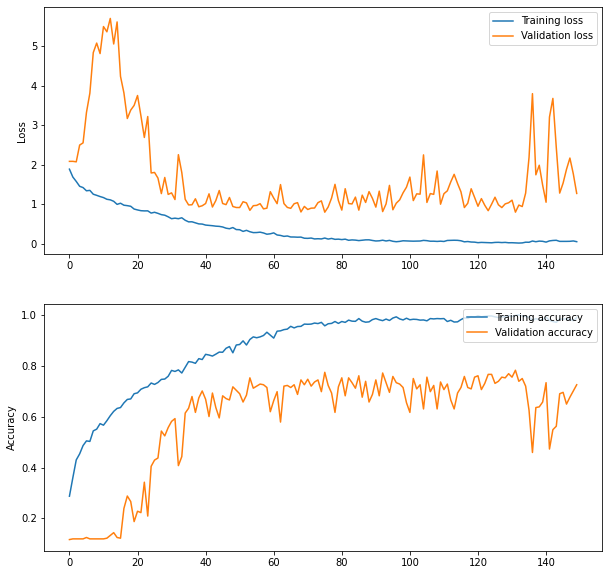

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
axes[0].plot(training_log.history["loss"],label="Training loss")
axes[0].plot(training_log.history["val_loss"],label="Validation loss")
axes[0].legend(loc="upper right")
axes[0].set_ylabel("Loss")
axes[1].plot(training_log.history["sparse_categorical_accuracy"],label="Training accuracy")
axes[1].plot(training_log.history["val_sparse_categorical_accuracy"],label="Validation accuracy")
axes[1].legend(loc="upper right")
axes[1].set_ylabel("Accuracy")
fig.show()

In [ ]:
model.evaluate(test_dataset)

5/5 [==============================] - 1s 187ms/step - loss: 1.7736 - sparse_categorical_accuracy: 0.6938


[1.7736260890960693, 0.6937500238418579]

# A tuned network


In [ ]:

model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(256,256,3)),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.0, 0.05)),
  tf.keras.layers.experimental.preprocessing.RandomCrop(224, 224),
  tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),
  tf.keras.layers.Conv2D(64, 7, strides=2, activation="relu", padding="same"),
  tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128,(4, 4), activation="relu", padding="same", kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256,(3, 3), activation="relu", padding="same", kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
  tf.keras.layers.Conv2D(256,(3, 3), activation="relu", padding="same", kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
  tf.keras.layers.Conv2D(256,(3, 3), activation="relu", padding="same", kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(8),
])
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(0.05, 23 * 300, 0.0001, power=1)
model.compile(
    optimizer=tf.keras.optimizers.SGD(
            learning_rate=learning_rate_fn, momentum=0.9, nesterov=True
        ),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom (RandomZoom)     (None, 256, 256, 3)       0         
_________________________________________________________________
random_crop_1 (RandomCrop)   (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      9472      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 64)       

In [ ]:
training_log = model.fit(
  train_dataset, epochs=300, validation_data=valid_dataset
)

Epoch 1/300
23/23 [==============================] - 4s 165ms/step - loss: 2.1037 - sparse_categorical_accuracy: 0.2092 - val_loss: 2.4700 - val_sparse_categorical_accuracy: 0.1168
Epoch 2/300
23/23 [==============================] - 4s 152ms/step - loss: 2.0167 - sparse_categorical_accuracy: 0.2643 - val_loss: 3.7157 - val_sparse_categorical_accuracy: 0.1168
Epoch 3/300
23/23 [==============================] - 4s 153ms/step - loss: 2.0921 - sparse_categorical_accuracy: 0.2452 - val_loss: 2.2529 - val_sparse_categorical_accuracy: 0.1413
Epoch 4/300
23/23 [==============================] - 3s 150ms/step - loss: 2.0544 - sparse_categorical_accuracy: 0.2486 - val_loss: 2.1405 - val_sparse_categorical_accuracy: 0.1984
Epoch 5/300
23/23 [==============================] - 4s 152ms/step - loss: 1.9762 - sparse_categorical_accuracy: 0.2663 - val_loss: 2.0704 - val_sparse_categorical_accuracy: 0.1984
Epoch 6/300
23/23 [==============================] - 3s 147ms/step - loss: 1.8830 - sparse_cate

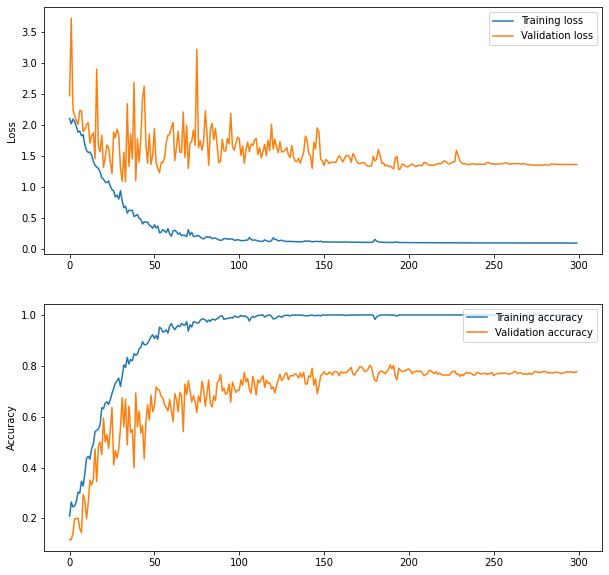

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
axes[0].plot(training_log.history["loss"],label="Training loss")
axes[0].plot(training_log.history["val_loss"],label="Validation loss")
axes[0].legend(loc="upper right")
axes[0].set_ylabel("Loss")
axes[1].plot(training_log.history["sparse_categorical_accuracy"],label="Training accuracy")
axes[1].plot(training_log.history["val_sparse_categorical_accuracy"],label="Validation accuracy")
axes[1].legend(loc="upper right")
axes[1].set_ylabel("Accuracy")
fig.show()

In [ ]:
np.max(training_log.history["val_sparse_categorical_accuracy"])

0.804347813129425

In [ ]:
np.argmax(training_log.history["val_sparse_categorical_accuracy"])

189

In [ ]:
model.evaluate(test_dataset)

5/5 [==============================] - 1s 191ms/step - loss: 1.7269 - sparse_categorical_accuracy: 0.7797


[1.7268762588500977, 0.7796875238418579]

In [ ]:
# 3 seconds per epoch, 300 epochs, average over 3 runs for stability, 200 architectures tested
3*300*3*200 / (60*60*24)

6.25

In [ ]:
64*23

1472

In [ ]:
1472/64

23.0

In [ ]:
23*50

1150